Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import decode_predictions
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.applications.resnet import decode_predictions
from tensorflow.keras.applications.resnet import preprocess_input
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
import  time
import tensorflow as tf
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications.densenet import decode_predictions
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import decode_predictions
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.applications.nasnet import decode_predictions
from tensorflow.keras.applications.nasnet import preprocess_input

In [ ]:
cd ..

/content


In [ ]:
#Already done. Do not run again
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
height_shift_range=0.1,shear_range=0.15, 
zoom_range=0.1,channel_shift_range = 10, horizontal_flip=True)

image_path ='/content/drive/My Drive/Covid CT/dataset/Test/CT_COVID/2020.01.24.919183-p27-134.png'

image = np.expand_dims(cv2.imread(image_path), 0)

save_here = '/content/drive/My Drive'
datagen.fit(image)

for x, val in zip(datagen.flow(image, 
        save_to_dir=save_here,     #this is where we figure out where to save
         save_prefix='new',        # it will save the images as 'aug_0912' some number for every new augmented image
        save_format='png'),range(1)) :     # here we define a range because we want 10 augmented images otherwise it will keep looping forever I think
  pass

In [ ]:
#Already done. Do not run again
import os

img_folder_path = '/content/drive/My Drive/Covid CT/dataset/Valid/CT_NonCOVID'
dirListing = os.listdir(img_folder_path)

print(len(dirListing))

109


In [ ]:
#for testing/exploring. Dont run
from os import getcwd
path = f"{getcwd()}/drive/My Drive/COVID 19 with 5 classes/keras-covid-19/Xc.h5"

In [ ]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
import keras
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.optimizers import RMSprop
import numpy as np
loaded_model = load_model('')
loaded_model.layers.pop()
loaded_model.layers.pop()


OSError: ignored

In [ ]:
loaded_model.summary()

NameError: ignored

In [ ]:
#for testing/exploring. Dont run
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model =Xception(input_shape = (224, 224, 3),
                                include_top =False  )
pre_trained_model.set_weights(loaded_model.get_weights())                              


for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

#last_layer = pre_trained_model.get_layer('mixed7')
#print('last layer output shape: ', last_layer.output_shape)
#ast_output = last_layer.output

83683744/83683744 [==============================] - 1s 0us/step


NameError: ignored

In [ ]:
#for testing/exploring. Dont run
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print("\nReached 92% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd
from tensorflow.keras import datasets, layers, models

In [ ]:
x=pre_trained_model.output
# Flatten the output layer to 1 dimension
x = layers.Flatten()(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(64, activation='relu')(x)

x = layers.Dropout(0.2)(x)                  

x = layers.Dense  (3, activation='softmax')(x)           

model = Model(inputs= pre_trained_model.input,outputs= x) 

model.summary()

NameError: ignored

In [ ]:
cd /content/drive/My Drive/


/content/drive/My Drive


In [ ]:
base_dir='Covid CT/dataset'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Valid')

train_Covid_dir = os.path.join(train_dir, 'CT_COVID')
train_NonCovid_dir = os.path.join(train_dir, 'CT_NonCOVID')
train_LungCancer_dir = os.path.join(train_dir, 'Lung_cancer')
# Directory with our validation cat/dog pictures
validation_Covid_dir = os.path.join(validation_dir, 'CT_COVID')
validation_NonCovid_dir = os.path.join(validation_dir, 'CT_NonCOVID')
validation_LungCancer_dir = os.path.join(validation_dir, 'Lung_cancer')

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255.,
                                   # width_shift_range = 0.2,
                                 #  height_shift_range = 0.2,
                                 #  zoom_range = 0.2,
                                   fill_mode='nearest')
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=10,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=10,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224))

Found 1297 images belonging to 3 classes.
Found 353 images belonging to 3 classes.


In [ ]:
IMG_DIM=150
import glob
import numpy as np
import matplotlib.pyplot as plt
#from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline
train_files = glob.glob('train_dir/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)



In [ ]:
img_id = 2595
cat_generator = train_datagen.flow(train_Covid_dir[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

NameError: ignored

In [ ]:
from tensorflow.keras.optimizers import Adam
batch_size=64
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
#callbacks = myCallback()
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(train_generator,
                             steps_per_epoch=20,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=15)
                            #  callbacks=[callbacks])

Epoch 1/15
20/20 [==============================] - 5s 247ms/step - loss: 9.3093 - accuracy: 0.5500 - val_loss: 2.7263 - val_accuracy: 0.6829
Epoch 2/15
20/20 [==============================] - 4s 209ms/step - loss: 1.9663 - accuracy: 0.7200 - val_loss: 0.9550 - val_accuracy: 0.7543
Epoch 3/15
20/20 [==============================] - 4s 209ms/step - loss: 0.5262 - accuracy: 0.7950 - val_loss: 0.4962 - val_accuracy: 0.8257
Epoch 4/15
20/20 [==============================] - 4s 199ms/step - loss: 0.4166 - accuracy: 0.7462 - val_loss: 0.4226 - val_accuracy: 0.8486
Epoch 5/15
20/20 [==============================] - 4s 216ms/step - loss: 0.3807 - accuracy: 0.7900 - val_loss: 0.5471 - val_accuracy: 0.8343
Epoch 6/15
20/20 [==============================] - 4s 203ms/step - loss: 0.3533 - accuracy: 0.8680 - val_loss: 0.4468 - val_accuracy: 0.8543
Epoch 7/15
20/20 [==============================] - 4s 207ms/step - loss: 0.3583 - accuracy: 0.8782 - val_loss: 0.4416 - val_accuracy: 0.8371
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

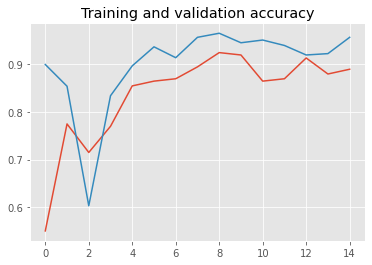

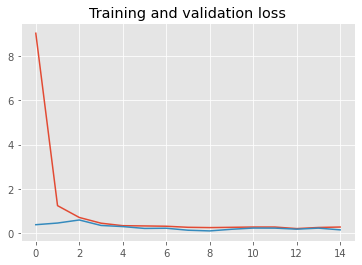

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

NameError: ignored

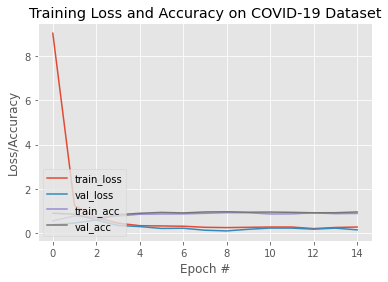

In [ ]:
EPOCHS=15
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N),history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N),history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N),history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])

In [ ]:
basepath = '/content/drive/MyDrive/'
train_Covid=os.listdir(basepath +train_Covid_dir)
train_Noncovid=os.listdir(basepath + train_NonCovid_dir)

In [ ]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
covid_img_files = [os.path.join(train_Covid_dir, f) for f in train_Covid]
noncovid_img_files = [os.path.join(train_NonCovid_dir, f) for f in train_Noncovid]

img_path = random.choice(covid_img_files + noncovid_img_files)
img = load_img(img_path, target_size=(224, 224))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

NameError: ignored

In [ ]:
predIdxs = model.predict(validation_generator, batch_size=64)
predIdxs = np.argmax(predIdxs, axis=1)

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, 35.3)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(validation_generator.classes, y_pred)
print(cm)
print('Classification Report')
target_names = ['CT_COVID','Lung_cancer', 'CT_NonCovid' ]
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
total = sum(sum(cm))
acc = (cm[0, 0,] + cm[1, 1]+cm[2,2]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1]+cm[0,2])


print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
df_cm = pd.DataFrame(cm, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [ ]:
model.save('/content/drive/My Drive/Covid CT/dataset/xceptionxray')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Covid CT/dataset/xceptionxray/assets


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
args = {
	"dataset": "Covid CT/dataset/Valid"
  }



In [ ]:
imagePaths = list(paths.list_images(args["dataset"]))
data = []
labels = []
for imagePath in imagePaths:
	label = imagePath.split(os.path.sep)[-2]

	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))
	
	data.append(image)
	labels.append(label)

data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
label_types = ('CT_COVID','CT_NonCOVID','Lung_cancer')

le = LabelEncoder();
labelsY  = le.fit_transform(labels)

c_labelsY = to_categorical(labelsY)

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, c_labelsY, 
	test_size=0.20, random_state=42)
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

In [ ]:
xtrain_base, xpred_base, ytrain_base, ypred_base = train_test_split(
    trainX, trainY, test_size=0.5, random_state=None)

In [ ]:
estimators = []

In [ ]:
model1 = keras.models.load_model("/content/drive/My Drive/Covid CT/dataset/Inceptionv3xray")

In [ ]:
estimators.append(('inceptionv3', model1))

In [ ]:
model2 = keras.models.load_model("/content/drive/My Drive/Covid CT/dataset/xceptionxray")

In [ ]:
estimators.append(('xception', model2))

In [ ]:
model3 = keras.models.load_model("/content/drive/MyDrive/Covid CT/dataset/Densenet")

OpError: ignored

In [ ]:
estimators.append(('densenet121', model3))

In [ ]:
model4 = keras.models.load_model("/content/drive/My Drive/Covid CT/dataset/Densenet")

In [ ]:
estimators.append(('densenet1212', model4))

In [ ]:
model5 = keras.models.load_model("/content/drive/My Drive/Covid CT/dataset/InceptionV3")

In [ ]:
estimators.append(('inceptionv32', model5))

In [ ]:
model6 = keras.models.load_model("/content/drive/My Drive/Covid CT/dataset/Xceptionn")

In [ ]:
estimators.append(('xcepption2', model6))

In [ ]:
!pip install deepstack==0.0.9

In [ ]:
import keras
from keras.utils.data_utils import get_file
import numpy as np
from deepstack.base import KerasMember

member1 = KerasMember(name="model1", keras_model=model1, train_batches=(trainX, trainY), val_batches=(testX, testY))
member2 = KerasMember(name="model2", keras_model=model2, train_batches=(trainX, trainY), val_batches=(testX, testY))
member3 = KerasMember(name="model3", keras_model=model3, train_batches=(trainX, trainY), val_batches=(testX, testY))
member4 = KerasMember(name="model4", keras_model=model4, train_batches=(trainX, trainY), val_batches=(testX, testY))
member5 = KerasMember(name="model5", keras_model=model5, train_batches=(trainX, trainY), val_batches=(testX, testY))
member6 = KerasMember(name="model6", keras_model=model6, train_batches=(trainX, trainY), val_batches=(testX, testY))

In [ ]:
from deepstack.ensemble import DirichletEnsemble

wAvgEnsemble = DirichletEnsemble()
wAvgEnsemble.add_members([member1, member2, member3, member4, member5, member6])
wAvgEnsemble.fit()
wAvgEnsemble.describe()

model1 - Weight: 0.4147 - roc_auc_score: 0.9854
model2 - Weight: 0.1634 - roc_auc_score: 0.9779
model3 - Weight: 0.0118 - roc_auc_score: 0.9910
model4 - Weight: 0.1113 - roc_auc_score: 0.9897
model5 - Weight: 0.2593 - roc_auc_score: 0.9825
model6 - Weight: 0.0395 - roc_auc_score: 0.9780
DirichletEnsemble roc_auc_score: 0.9997


In [ ]:
from deepstack.ensemble import StackEnsemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

stack = StackEnsemble()
stack.model = RandomForestRegressor(verbose=0, n_estimators=100, 
                                  max_depth=10, n_jobs=10, min_samples_split=10)
stack.add_members([member1, member2, member3, member4, member5,member6])
stack.fit()
stack.describe(metric = accuracy_score)

In [ ]:
  def get_model():
	    model = VGG16()
	    model = load_model_weights(model, "vgg16_weights.h5")
	    
	    model.add(Lambda(global_average_pooling, 
	              output_shape=global_average_pooling_shape))
	    model.add(Dense(2, activation = 'softmax', init='uniform'))
	    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.5, nesterov=True)
	    model.compile(loss = 'categorical_crossentropy', \
            optimizer = sgd, metrics=['accuracy'])
	    return model

In [ ]:
print(get_model())

553467096/553467096 [==============================] - 15s 0us/step


NameError: ignored